## Unsupervised_learning

### `1 task`

In [1]:
#pip install scikit-learn==1.1

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
feature_names = boston["feature_names"]
target = boston["target"]

C:\Users\andri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
X = pd.DataFrame(data=data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

C:\Users\andri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(404, 2)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

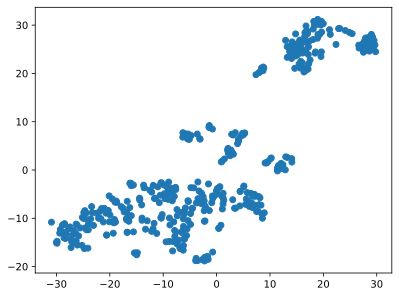

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### `2 task`

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train_scaled)
X_train_kmeans

C:\Users\andri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

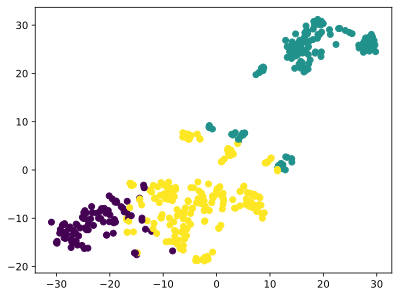

In [32]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmeans)

In [43]:
mean0 = y_train[X_train_kmeans == 0].mean()
mean1 = y_train[X_train_kmeans == 1].mean()
mean2 = y_train[X_train_kmeans == 2].mean()
mean0, mean1, mean2

(price    27.788372
 dtype: float64,
 price    16.165354
 dtype: float64,
 price    24.958115
 dtype: float64)

In [48]:
mean0 = X_train.loc[X_train_kmeans == 0, "CRIM"].mean()
mean1 = X_train.loc[X_train_kmeans == 1, "CRIM"].mean()
mean2 = X_train.loc[X_train_kmeans == 2, "CRIM"].mean()
mean0, mean1, mean2

(0.07356558139534886, 10.797028425196853, 0.42166020942408367)

### `3 task`

In [50]:
X_test_kmeans = kmeans.predict(X_test_scaled)
X_test_kmeans

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [53]:
mean0 = y_test[X_test_kmeans == 0].mean()
mean1 = y_test[X_test_kmeans == 1].mean()
mean2 = y_test[X_test_kmeans == 2].mean()
mean0, mean1, mean2

(price    31.35
 dtype: float64,
 price    16.437143
 dtype: float64,
 price    21.860784
 dtype: float64)

In [55]:
mean0 = X_test.loc[X_test_kmeans == 0, "CRIM"].mean()
mean1 = X_test.loc[X_test_kmeans == 1, "CRIM"].mean()
mean2 = X_test.loc[X_test_kmeans == 2, "CRIM"].mean()
mean0, mean1, mean2

(0.062060000000000004, 10.165531142857143, 0.26607882352941176)

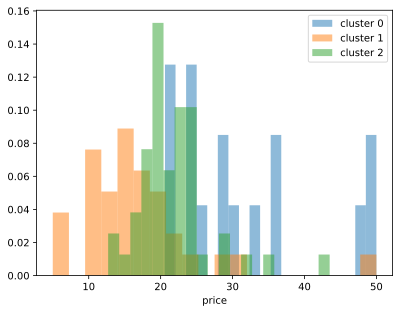

In [58]:
plt.hist(y_test[X_test_kmeans == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_test[X_test_kmeans == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_test[X_test_kmeans == 2], bins=20, density=True, alpha=0.5)

plt.legend(["cluster 0", "cluster 1", "cluster 2"])
plt.xlabel("price")

plt.show()

### `4 task`

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_pred)

0.668759493535632

In [69]:
X_train_scaled["cluster"] = X_train_kmeans
X_test_scaled["cluster"] = X_test_kmeans

In [72]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_pred)

0.6688794358164192

In [74]:
lr.fit(X_train_scaled[X_train_scaled["cluster"] == 0], y_train[X_train_kmeans == 0])
y_pred0 = lr.predict(X_test_scaled[X_test_scaled["cluster"] == 0])
r2_score(y_test[X_test_kmeans == 0], y_pred0)

0.9155161972050824

In [75]:
lr.fit(X_train_scaled[X_train_scaled["cluster"] == 1], y_train[X_train_kmeans == 1])
y_pred1 = lr.predict(X_test_scaled[X_test_scaled["cluster"] == 1])
r2_score(y_test[X_test_kmeans == 1], y_pred1)

0.5231438944312401

In [98]:
lr.fit(X_train_scaled[X_train_scaled["cluster"] == 2], y_train[X_train_kmeans == 2])
y_pred2 = lr.predict(X_test_scaled[X_test_scaled["cluster"] == 2])
r2_score(y_test[X_test_kmeans == 2], y_pred2)

0.7215240423132002

In [107]:
y_test_all = np.vstack([y_test[X_test_kmeans == 0], y_test[X_test_kmeans == 1], y_test[X_test_kmeans == 2]])
y_pred_all = np.vstack([y_pred0, y_pred1, y_pred2])
r2_score(y_test_all, y_pred_all)

0.7955116908317021

### `5 task`

In [116]:
from sklearn.datasets import load_wine

wine = load_wine()
data = wine["data"]
feature_names = wine["feature_names"]
target = wine["target"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["class"])

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 1), (36, 1))

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [135]:
n_class = y["class"].nunique()
n_class

3

In [146]:
tsne = TSNE(n_components=2, learning_rate=300, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

C:\Users\andri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(142, 2)

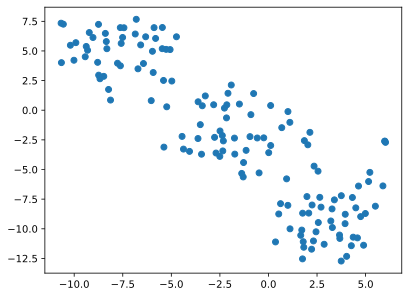

In [148]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [186]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train_kmeans = kmeans.fit_predict(X_train_scaled)

spectral_clustering = SpectralClustering(n_clusters=3, n_neighbors=5)
labels_train_spec = spectral_clustering.fit_predict(X_train_scaled)

agg_clustering = AgglomerativeClustering(n_clusters=3)
labels_train_agg = agg_clustering.fit_predict(X_train_scaled)
labels_train_agg

C:\Users\andri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 2, 2], dtype=int64)

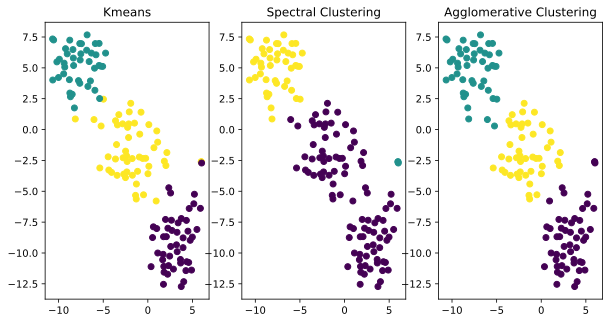

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=3)

fig.set_size_inches(10, 5)

ax1, ax2, ax3 = ax.flatten()

ax1.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train_kmeans)
ax1.title.set_text("Kmeans")

ax2.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train_spec)
ax2.title.set_text("Spectral Clustering")

ax3.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train_agg)
ax3.title.set_text("Agglomerative Clustering")

### `6 task`

In [237]:
from sklearn.datasets import fetch_olivetti_faces

oliv = fetch_olivetti_faces()
data = oliv["data"]
target = oliv["target"]
X = pd.DataFrame(data)
y = pd.DataFrame(target)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 4096), (320, 1), (80, 4096), (80, 1))

In [239]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression() 
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

res = accuracy_score(y_test, y_pred)

C:\Users\andri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [241]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train_scaled)
pca.explained_variance_ratio_[:70].sum()

0.9104985

In [244]:
pca = PCA(n_components=70, random_state=42)

X_train_mc = pca.fit_transform(X_train_scaled)
X_test_mc = pca.transform(X_test_scaled)

In [246]:
lr = LogisticRegression()
lr.fit(X_train_mc, y_train)
y_pred_mc = lr.predict(X_test_mc)
res_mc = accuracy_score(y_test, y_pred_mc)

C:\Users\andri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [249]:
res, res_mc

(0.975, 0.975)